In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv("./Used_fiat_500_in_Italy_dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model            380 non-null    object 
 1   engine_power     380 non-null    int64  
 2   transmission     380 non-null    object 
 3   age_in_days      380 non-null    int64  
 4   km               380 non-null    int64  
 5   previous_owners  380 non-null    int64  
 6   lat              380 non-null    float64
 7   lon              380 non-null    float64
 8   price            380 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 26.8+ KB


In [3]:
feature="km"
output="price"

x=data[feature].to_numpy()
y=data[output].to_numpy()

In [4]:
x_train, x_test, y_train, y_test = train_test_split (x, y, random_state=42, test_size=0.2)

In [5]:
regressor=LinearRegression() #retta non addestarata

In [6]:
regressor.fit(x_train.reshape((-1,1)), y_train)    #vuole i km come array di array da un elemento

LinearRegression()

In [7]:
a=regressor.coef_[0] #contiene tutti i coefficenti angolari, nel nostro caso visto che abbiamo solo 2 variabili: x, in funzione di y andiamo a prendere la zeresima posizione
a

-0.03531752350085319

In [8]:
b=regressor.intercept_ #termine noto della retta

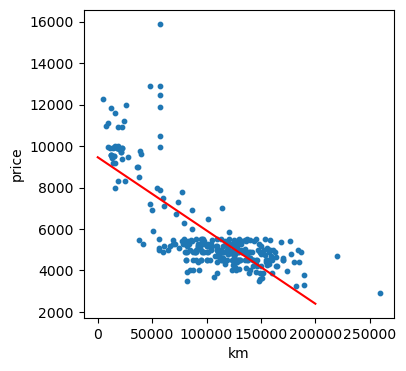

In [10]:
array_x=np.linspace(0, 200000, 10)
array_y=a*array_x + b
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(x_train, y_train, s=10)
ax.plot(array_x, array_y, c="r")
ax.set_xlabel(feature)
ax.set_ylabel(output)
plt.show()

In [13]:
#Coefficiente di determinazione sui dati di training
regressor.score(x_train.reshape((-1,1)), y_train)

0.5929708569057538

In [14]:
#Coefficiente di determinazione sui dati di test
regressor.score(x_test.reshape((-1,1)), y_test)

0.6333592375482102

In [15]:
fiat_500=np.array([[30_000]])
regressor.predict(fiat_500)

array([8399.96483729])